In [126]:
from __future__ import (absolute_import, division, print_function)
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

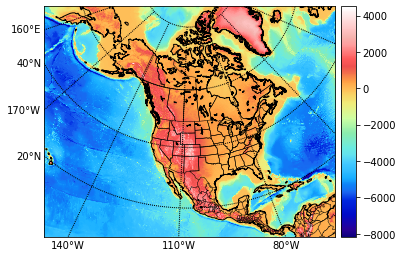

In [127]:
etopodata = Dataset('etopo5.cdf')
# etopodata.variables.keys()

lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
topoin = etopodata.variables['ROSE'][:]

topoin,lons = shiftgrid(180.,topoin,lons,start=False) 
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)


nx = int((m.xmax-m.xmin)/5000.)+1
ny = int((m.ymax-m.ymin)/5000.)+1

topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
im = m.imshow(topodat,cm.GMT_haxby)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

parallels = np.arange(0.,180,20.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)

cb = m.colorbar(im,"right", size="5%", pad='2%')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


warp to orthographic map ...


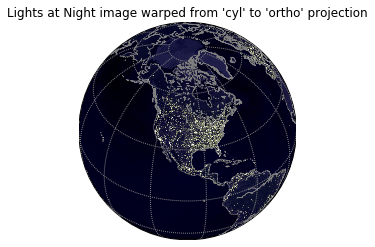

In [129]:
fig=plt.figure()

m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
m.warpimage(image='earth_lights_lrg.jpg')

m.drawcoastlines(linewidth=0.5,color='0.5')
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')

plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')

plot native cylindrical map (no warping needed) ...


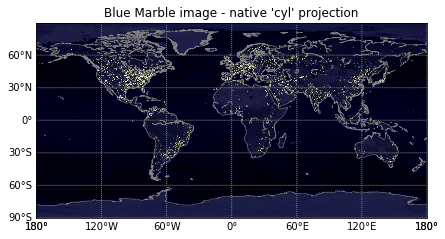

In [152]:
fig = plt.figure(figsize=(7,7))

m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='l')

im = m.bluemarble(scale=0.5)
m.warpimage(image='earth_lights_lrg.jpg')

m.drawcoastlines(linewidth=0.5,color='0.5')
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0],color='0.5')

plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()